# Decision Tree Algorithm

In [1]:
import numpy as np
import pandas as pd

In [2]:
employee=pd.read_csv('/content/drive/MyDrive/Python Datasets/employee.csv')

In [3]:
employee.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
print(employee.EmployeeCount.unique())
print(employee.Over18.unique())
print(employee.StandardHours.unique())
print(employee.EmployeeNumber.unique())

[1]
['Y']
[80]
[   1    2    4 ... 2064 2065 2068]


In [5]:
employee=employee.drop(['EmployeeCount','Over18','StandardHours','EmployeeNumber'],axis=1)

In [6]:
employee.shape

(1470, 31)

In [7]:
employee.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [8]:
employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

In [9]:
# Convert Categorical data into Numerical Data
employee_dummies=pd.get_dummies(employee[['BusinessTravel','Department','EducationField','Gender',
                                          'JobRole','MaritalStatus','OverTime']],drop_first=True)

In [10]:
# Remove or drop the categorical data/columns from "employee" Table
employee=employee.drop(['BusinessTravel','Department','EducationField','Gender',
                                          'JobRole','MaritalStatus','OverTime'],axis=1)

In [11]:
# combine "employee" and "employee_dummies" tables
employee=pd.concat([employee,employee_dummies],axis=1)

In [12]:
employee.shape

(1470, 45)

# Implementation of Decision Tree Algorithm

In [13]:
# separate dependent and independent variables
X=employee.drop('Attrition',axis=1) # Independent Variable
y=employee['Attrition']  # Dependent Variable

In [14]:
# Split the data into train and test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [17]:
# implement decision tree algo
# Model-1
from sklearn.tree import DecisionTreeClassifier
dtree1=DecisionTreeClassifier()
dtree1.fit(X_train,y_train)
y_pred1=dtree1.predict(X_test)

In [18]:
# Model-2
dtree2=DecisionTreeClassifier(criterion='entropy',max_depth=4)
dtree2.fit(X_train,y_train)
y_pred2=dtree2.predict(X_test)

In [19]:
# Model-3
dtree3=DecisionTreeClassifier(criterion='entropy',max_depth=2,min_samples_leaf=2)
dtree3.fit(X_train,y_train)
y_pred3=dtree3.predict(X_test)

In [21]:
# Measure accuracy,precision and recall of all models
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print('Model-1')
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(classification_report(y_test,y_pred1))
print('-----------------------------------------------------------------')
print('Model-2')
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(classification_report(y_test,y_pred2))
print('-----------------------------------------------------------------')
print('Model-3')
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(classification_report(y_test,y_pred3))


Model-1
0.782312925170068
[[323  57]
 [ 39  22]]
              precision    recall  f1-score   support

          No       0.89      0.85      0.87       380
         Yes       0.28      0.36      0.31        61

    accuracy                           0.78       441
   macro avg       0.59      0.61      0.59       441
weighted avg       0.81      0.78      0.79       441

-----------------------------------------------------------------
Model-2
0.8594104308390023
[[376   4]
 [ 58   3]]
              precision    recall  f1-score   support

          No       0.87      0.99      0.92       380
         Yes       0.43      0.05      0.09        61

    accuracy                           0.86       441
   macro avg       0.65      0.52      0.51       441
weighted avg       0.81      0.86      0.81       441

-----------------------------------------------------------------
Model-3
0.8616780045351474
[[375   5]
 [ 56   5]]
              precision    recall  f1-score   support

          

In [24]:
# apply grid search of our model and get estimated parameters
from sklearn.model_selection import GridSearchCV
parameters={'criterion':['gini','entropy'],
            'max_depth':[2,3,4,5],
            'min_samples_leaf':[1,2,3,4],
            'max_features':[1,3,5,10],
            'min_samples_split':[2,3,5,10]}
grid_search=GridSearchCV(estimator=dtree3,param_grid=parameters,cv=5)
grid_search.fit(X_train,y_train)
best_parameters=grid_search.best_params_
best_parameters
#

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


{'criterion': 'entropy',
 'max_depth': 4,
 'max_features': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 5}

In [25]:
# Model-4
dtree4=DecisionTreeClassifier(criterion='entropy',max_depth=4,max_features=5,min_samples_leaf=1,min_samples_split=5)
dtree4.fit(X_train,y_train)
y_pred4=dtree4.predict(X_test)
print(accuracy_score(y_test,y_pred4))
print(confusion_matrix(y_test,y_pred4))
print(classification_report(y_test,y_pred4))

0.8684807256235828
[[375   5]
 [ 53   8]]
              precision    recall  f1-score   support

          No       0.88      0.99      0.93       380
         Yes       0.62      0.13      0.22        61

    accuracy                           0.87       441
   macro avg       0.75      0.56      0.57       441
weighted avg       0.84      0.87      0.83       441



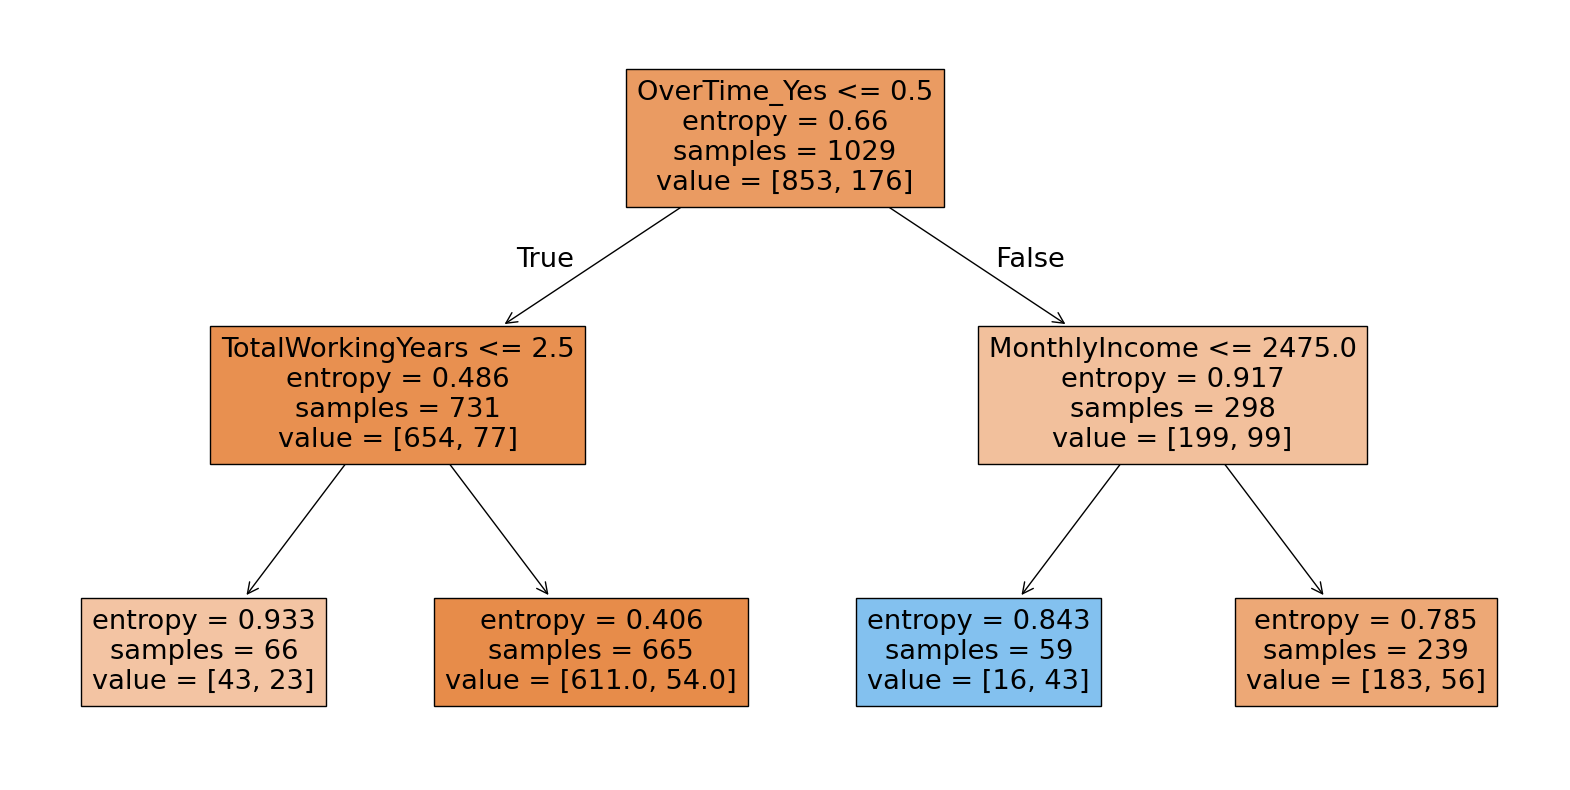

In [26]:
# create a decision tree using matplotlib library of model 3 and 4
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plot_tree(dtree3,filled=True,feature_names=X.columns)
plt.show()


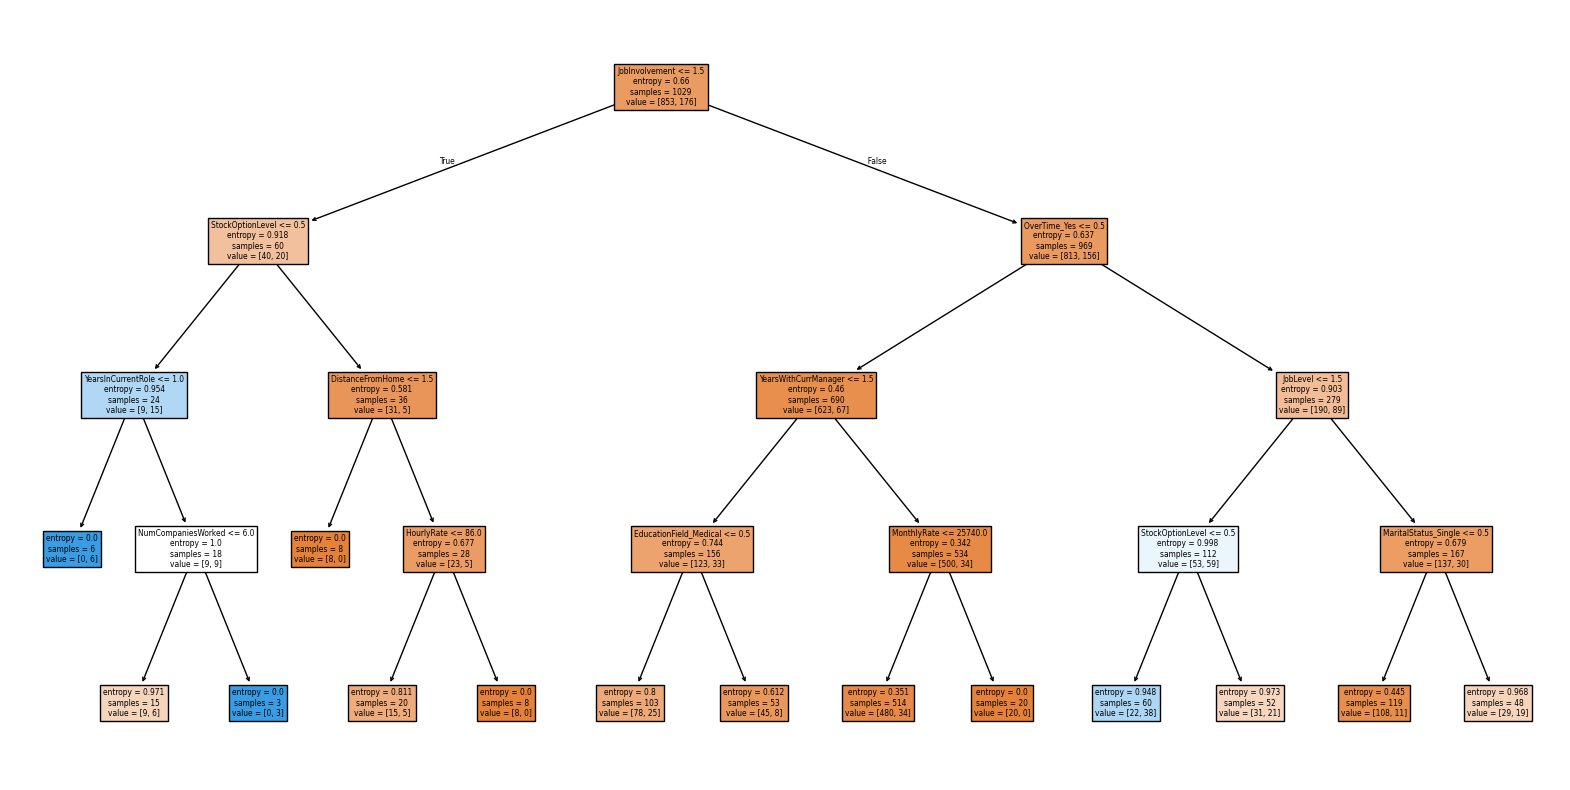

In [27]:
plt.figure(figsize=(20,10))
plot_tree(dtree4,filled=True,feature_names=X.columns)
plt.show()